In [5]:
import pandas as pd
import contextily
from matplotlib import pyplot as plt
import geopandas

In [3]:
restaurants = pd.read_csv('./data/paris_restaurants.csv')

                                 type              x             y
0                 European restuarant  259641.691646  6.251867e+06
1       Traditional French restaurant  259572.339603  6.252030e+06
2       Traditional French restaurant  259657.276374  6.252143e+06
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06
4       Traditional French restaurant  259597.943086  6.252230e+06


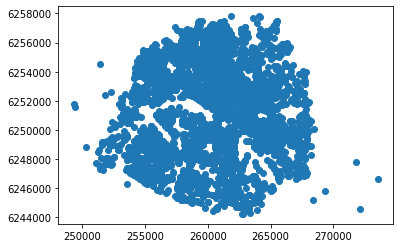

In [6]:
# Inspect the first rows of restaurants
print(restaurants.head())

# Make a plot of all points
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o')
plt.show()

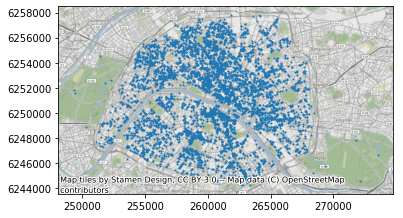

In [7]:
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o', markersize=1)
contextily.add_basemap(ax)
plt.show()

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  


ImportError: The descartes package is required for plotting polygons in geopandas.

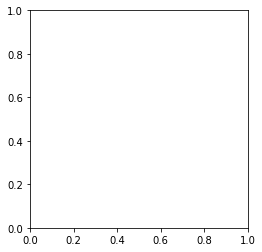

In [9]:
# Read the Paris districts dataset
districts = geopandas.read_file('./data/paris_districts_utm.geojson')

# Inspect the first rows
print(districts.head())

# Make a quick visualization of the districts
districts.plot()
plt.show()

In [ ]:
# Check what kind of object districts is
print(type(districts))

# Check the type of the geometry attribute
print(type(districts.geometry))

# Inspect the first rows of the geometry
print(districts.geometry.head())

# Inspect the area of the districts
print(districts.area)

                                 type              x             y  \
0                 European restuarant  259641.691646  6.251867e+06   
1       Traditional French restaurant  259572.339603  6.252030e+06   
2       Traditional French restaurant  259657.276374  6.252143e+06   
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06   
4       Traditional French restaurant  259597.943086  6.252230e+06   

                         geometry  
0  POINT (259641.692 6251867.063)  
1  POINT (259572.340 6252029.683)  
2  POINT (259657.276 6252143.401)  
3  POINT (259684.438 6252203.137)  
4  POINT (259597.943 6252230.044)  


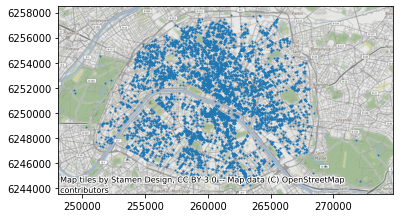

In [10]:
# Read the restaurants csv file into a DataFrame
df = pd.read_csv("./data/paris_restaurants.csv")

# Convert it to a GeoDataFrame
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.x, df.y))

# Inspect the first rows of the restaurants GeoDataFrame
print(restaurants.head())

# Make a plot of the restaurants
ax = restaurants.plot(markersize=1)
import contextily
contextily.add_basemap(ax)
plt.show()

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


ImportError: The descartes package is required for plotting polygons in geopandas.

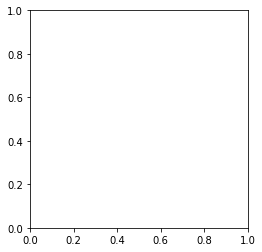

In [11]:
# Inspect the first rows of the districts dataset
print(districts.head())

# Inspect the area of the districts
print(districts.area)

# Add a population density column
districts['population_density'] = districts.population / districts.area * 10 ** 6

# Make a plot of the districts colored by the population density
districts.plot(column='population_density', legend=True)
plt.show()

In [ ]:
# Load the restaurants data
restaurants = geopandas.read_file("paris_restaurants.geosjon")

# Calculate the number of restaurants of each type
type_counts = restaurants.groupby('type').size()

# Print the result
print(type_counts)